# Athelete Profile

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from features.utils import *
from features.athlete_profile import *

In [2]:
# Load Data
data = loadData()
data.head()

,ID de l'activité,Date de l'activité,Nom de l'activité,Type d'activité,Description de l'activité,Temps écoulé,Mesure d'effort,Équipement utilisé pour l'activité,Nom du fichier,Poids de l'athlète,...,Puissance moyenne pondérée,Nombre d'échantillons de puissance,Humidité,Vitesse du vent,Couverture nuageuse,Indice UV,Date,Time,Week,Month
0,102155537,27 déc. 2013 à 12:35:59,Enfin la reprise !,Vélo,NaN,51.60,NaN,NaN,activities/102155537.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-27,12:35:59,52,12
1,102581269,29 déc. 2013 à 12:06:22,"I2/3, pointes I4",Vélo,NaN,92.28,NaN,NaN,activities/102581269.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-29,12:06:22,52,12
2,103191732,1 janv. 2014 à 11:22:39,SG / I2 en souplesse,Vélo,NaN,145.17,NaN,NaN,activities/103191732.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01,11:22:39,1,1
3,104215700,5 janv. 2014 à 12:17:58,SG à I3 - avec Nico et Pascal,Vélo,NaN,197.43,NaN,NaN,activities/104215700.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-05,12:17:58,1,1
4,106526947,15 janv. 2014 à 12:32:41,Sortie club - Fartlek,Vélo,NaN,156.48,NaN,NaN,activities/106526947.gpx,94.699997,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-15,12:32:41,3,1


In [3]:
data.columns

Index(['ID de l'activité', 'Date de l'activité', 'Nom de l'activité',
       'Type d'activité', 'Description de l'activité', 'Temps écoulé',
       'Mesure d'effort', 'Équipement utilisé pour l'activité',
       'Nom du fichier', 'Poids de l'athlète', 'Poids du vélo',
       'Durée de déplacement', 'Distance', 'Vitesse max.', 'Vitesse moyenne',
       'Dénivelé positif', 'Dénivelé négatif', 'Altitude min.',
       'Altitude max.', 'Pente max.', 'Pente moyenne', 'Cadence max.',
       'Cadence moyenne', 'Fréquence cardiaque maximum',
       'Fréquence cardiaque moyenne', 'Puissance moyenne', 'Calories',
       'Température moyenne', 'Puissance moyenne pondérée',
       'Nombre d'échantillons de puissance', 'Humidité', 'Vitesse du vent',
       'Couverture nuageuse', 'Indice UV', 'Date', 'Time', 'Week', 'Month'],
      dtype='object')

### Metrics

In [4]:
# set athlete stats
max_HR = 190
ftp = 360

In [5]:
#Sub df for metrics
sub_df = create_sub_df(data)
sub_df

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Mesure d'effort,Puissance moyenne pondérée
46,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,87.599998,54.0,NaN
47,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,87.599998,55.0,NaN
48,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,87.599998,154.0,NaN
49,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,87.599998,16.0,NaN
50,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,87.599998,112.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,NaN,46.0,400.0
2389,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,NaN,272.0,335.0
2390,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,NaN,1.0,204.0
2391,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,NaN,26.0,229.0


In [6]:
sub_df.isna().sum()

Date                             0
Time                             0
Nom du fichier                   0
Durée de déplacement             0
Distance                         0
Fréquence cardiaque moyenne      0
Fréquence cardiaque maximum    344
Vitesse moyenne                652
Cadence moyenne                124
Puissance moyenne                3
Poids de l'athlète             341
Mesure d'effort                 50
Puissance moyenne pondérée     206
dtype: int64

#### FTP

Your Functional Threshold Power (FTP) is the maximum average power that you can hold for one continuous hour. For example, if you were to ride a 40k time trial in 60 minutes at an average power of 275W, your FTP would be 275W.

<AxesSubplot: xlabel='Puissance moyenne', ylabel='Count'>

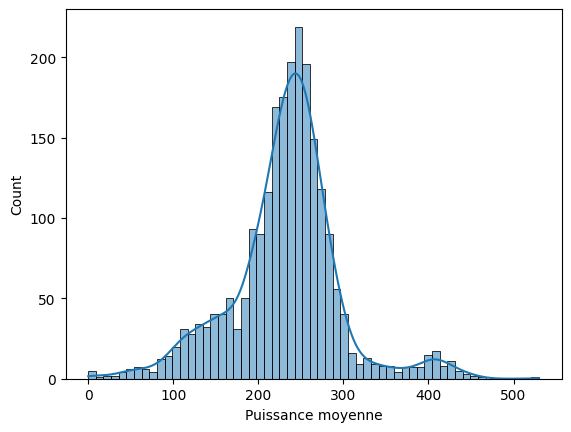

In [7]:
sns.histplot(data=data, x='Puissance moyenne', kde=True)

9 Novembre: Test FTP - 360 W

#### Heart Rate Zones

In [8]:
hr_zones = calculate_hr_zones_hrmax(max_HR)
hr_zones

,Zone,Name,Lower Bound,Upper Bound,Range
0,1,Endurance,95.0,114.0,< 114.0
1,2,Moderate,114.0,133.0,114 - 133
2,3,Tempo,133.0,152.0,133 - 152
3,4,Threshold,152.0,171.0,152 - 171
4,5,Anaerobic,171.0,inf,>171.0


In [4]:
def calculate_hr_zones_strava(hrmax):
    """
    Calculates heart rate zones using the percentage of HRmax method based on Strava findings

    Args:
        hrmax (int): Maximum heart rate.

    Returns:
        pandas.DataFrame: Heart rate zones, including zone number, zone name,
                           and heart rate range for each zone.
    """

    zone_ranges = [0.50, 0.585, 0.7772, 0.87, 0.9689]
    zone_names = ['Endurance', 'Moderate', 'Tempo', 'Threshold', 'Anaerobic']
    hr_zones = []
    for i, zone_range in enumerate(zone_ranges):
        lower_range = zone_ranges[i] * hrmax
        upper_range = zone_ranges[i+1] * hrmax if i+1 < len(zone_ranges) else float("inf")
        if i == 0:
            hr_range = f'< {upper_range:.0f}'
        elif i == 4:
            hr_range = f'>{lower_range:.0f}'
        else:
            hr_range = f'{lower_range:.0f} - {upper_range:.0f}'
        hr_zones.append((i+1, zone_names[i], round(lower_range,0), round(upper_range,0), hr_range))
    zones_df = pd.DataFrame(hr_zones, columns=['Zone', 'Name', 'Lower Bound', 'Upper Bound', 'Range'])

    return zones_df

In [5]:
calculate_hr_zones_strava(190)

,Zone,Name,Lower Bound,Upper Bound,Range
0,1,Endurance,95.0,111.0,< 111
1,2,Moderate,111.0,148.0,111 - 148
2,3,Tempo,148.0,165.0,148 - 165
3,4,Threshold,165.0,184.0,165 - 184
4,5,Anaerobic,184.0,inf,>184


#### Intensity Score

In [9]:
sub_df = intensity_score(sub_df, 'Puissance moyenne pondérée', ftp)
sub_df.head()

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Mesure d'effort,Puissance moyenne pondérée,intensity_score
46,2014-04-15,14:35:30,activities/142879521.tcx.gz,112.52,47.67,127.316002,176.0,NaN,73.387299,219.221359,87.599998,54.0,NaN,NaN
47,2014-04-17,14:29:30,activities/143568422.tcx.gz,73.92,33.36,130.358002,182.0,NaN,79.790298,241.315857,87.599998,55.0,NaN,NaN
48,2014-04-19,10:56:24,activities/144313052.tcx.gz,217.67,85.62,139.462006,183.0,NaN,72.434898,234.804291,87.599998,154.0,NaN,NaN
49,2014-04-21,14:27:58,activities/145168490.tcx.gz,50.32,25.62,111.242996,144.0,NaN,96.695900,184.828018,87.599998,16.0,NaN,NaN
50,2014-04-22,12:44:13,activities/145556830.tcx.gz,202.33,88.02,143.753006,174.0,NaN,76.811096,240.926056,87.599998,112.0,NaN,NaN


#### Time in Zones

In [10]:
data_vo2_fit = sub_df[sub_df["Nom du fichier"].str.contains(".fit")]
data_vo2_fit.head()

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Mesure d'effort,Puissance moyenne pondérée,intensity_score
663,2017-09-03,11:08:17,activities/1272038048.fit.gz,67.53,39.50,138.995026,174.0,NaN,90.237099,266.073975,91.0,54.0,310.0,86.11
689,2017-10-26,14:33:17,activities/1354264574.fit.gz,59.27,29.44,140.061310,179.0,NaN,81.347870,258.270538,91.0,48.0,310.0,86.11
690,2017-10-28,12:14:35,activities/1357422018.fit.gz,117.05,51.06,101.433411,172.0,NaN,82.146042,131.771713,91.0,19.0,211.0,58.61
691,2017-10-29,07:12:07,activities/1358014051.fit.gz,101.75,40.97,125.681000,182.0,NaN,81.164803,213.772003,91.0,56.0,294.0,81.67
692,2017-10-30,15:51:33,activities/1360150637.fit.gz,35.22,19.09,123.212326,155.0,NaN,91.744896,206.869675,91.0,11.0,222.0,61.67


In [14]:
#zone_data = calculate_time_in_zones(data_vo2_fit, hr_data)
#zone_data.to_csv("data/zone_data.csv")

zone_data = pd.read_csv("data/zone_data.csv", index_col="Unnamed: 0")
zone_data

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,Poids de l'athlète,Mesure d'effort,Puissance moyenne pondérée,intensity_score,time_z1,time_z2,time_z3,time_z4,time_z5
663,2017-09-03,11:08:17,activities/1272038048.fit.gz,67.53,39.50,138.995026,174.0,NaN,90.237099,266.073975,91.0,54.0,310.0,86.11,0.01,0.02,0.03,0.11,0.01
689,2017-10-26,14:33:17,activities/1354264574.fit.gz,59.27,29.44,140.061310,179.0,NaN,81.347870,258.270538,91.0,48.0,310.0,86.11,0.06,0.26,0.39,0.13,0.09
690,2017-10-28,12:14:35,activities/1357422018.fit.gz,117.05,51.06,101.433411,172.0,NaN,82.146042,131.771713,91.0,19.0,211.0,58.61,0.82,0.13,0.01,0.01,0.00
691,2017-10-29,07:12:07,activities/1358014051.fit.gz,101.75,40.97,125.681000,182.0,NaN,81.164803,213.772003,91.0,56.0,294.0,81.67,0.42,0.27,0.07,0.05,0.14
692,2017-10-30,15:51:33,activities/1360150637.fit.gz,35.22,19.09,123.212326,155.0,NaN,91.744896,206.869675,91.0,11.0,222.0,61.67,0.28,0.44,0.22,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2023-02-15,09:29:58,activities/9194335010.fit.gz,25.45,18.11,155.882782,NaN,42.70,94.063995,375.270477,NaN,46.0,400.0,111.11,0.07,0.00,0.15,0.70,0.04
2389,2023-02-16,10:59:50,activities/9201718878.fit.gz,218.73,139.03,147.699341,NaN,38.14,83.431664,290.123718,NaN,272.0,335.0,93.06,0.04,0.15,0.31,0.44,0.01
2390,2023-02-16,10:31:27,activities/9201719852.fit.gz,8.97,4.04,107.026070,NaN,27.03,69.140045,168.564240,NaN,1.0,204.0,56.67,0.65,0.33,0.00,0.00,0.00
2391,2023-02-17,09:39:32,activities/9206565665.fit.gz,143.42,73.94,105.816284,NaN,30.93,75.174011,185.966919,NaN,26.0,229.0,63.61,0.63,0.30,0.04,0.00,0.00


#### Relative Effort

1- Calculate the athlete's maximum Heart Rate

2- Calculate training impulse (TRIMP) for the workout

3- Calculate TRIMP score as a percentage of maximum TRIMP score (TRIMPmax) for a given period (e.g., a week or a month)

4- Finally, calculate **Relative Effort** score as a percentage of TRIMP% score

In [15]:
zone_data = relative_effort_measure(zone_data)
zone_data.head()

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,Puissance moyenne pondérée,intensity_score,time_z1,time_z2,time_z3,time_z4,time_z5,TRIMP,TRIMP_score,Relative Effort
663,2017-09-03,11:08:17,activities/1272038048.fit.gz,67.53,39.50,138.995026,174.0,NaN,90.237099,266.073975,...,310.0,86.11,0.01,0.02,0.03,0.11,0.01,63.0,12.80,14.406400
689,2017-10-26,14:33:17,activities/1354264574.fit.gz,59.27,29.44,140.061310,179.0,NaN,81.347870,258.270538,...,310.0,86.11,0.06,0.26,0.39,0.13,0.09,272.0,55.28,54.607427
690,2017-10-28,12:14:35,activities/1357422018.fit.gz,117.05,51.06,101.433411,172.0,NaN,82.146042,131.771713,...,211.0,58.61,0.82,0.13,0.01,0.01,0.00,115.0,23.37,45.590975
691,2017-10-29,07:12:07,activities/1358014051.fit.gz,101.75,40.97,125.681000,182.0,NaN,81.164803,213.772003,...,294.0,81.67,0.42,0.27,0.07,0.05,0.14,207.0,42.07,71.343708
692,2017-10-30,15:51:33,activities/1360150637.fit.gz,35.22,19.09,123.212326,155.0,NaN,91.744896,206.869675,...,222.0,61.67,0.28,0.44,0.22,0.01,0.00,186.0,37.80,22.188600


#### TSS (Training Load)

In [16]:
zone_data = training_load_measure(zone_data, ftp)
zone_data.head()

,Date,Time,Nom du fichier,Durée de déplacement,Distance,Fréquence cardiaque moyenne,Fréquence cardiaque maximum,Vitesse moyenne,Cadence moyenne,Puissance moyenne,...,intensity_score,time_z1,time_z2,time_z3,time_z4,time_z5,TRIMP,TRIMP_score,Relative Effort,TSS
663,2017-09-03,11:08:17,activities/1272038048.fit.gz,67.53,39.50,138.995026,174.0,NaN,90.237099,266.073975,...,86.11,0.01,0.02,0.03,0.11,0.01,63.0,12.80,14.406400,83.456138
689,2017-10-26,14:33:17,activities/1354264574.fit.gz,59.27,29.44,140.061310,179.0,NaN,81.347870,258.270538,...,86.11,0.06,0.26,0.39,0.13,0.09,272.0,55.28,54.607427,73.248116
690,2017-10-28,12:14:35,activities/1357422018.fit.gz,117.05,51.06,101.433411,172.0,NaN,82.146042,131.771713,...,58.61,0.82,0.13,0.01,0.01,0.00,115.0,23.37,45.590975,67.014972
691,2017-10-29,07:12:07,activities/1358014051.fit.gz,101.75,40.97,125.681000,182.0,NaN,81.164803,213.772003,...,81.67,0.42,0.27,0.07,0.05,0.14,207.0,42.07,71.343708,113.107278
692,2017-10-30,15:51:33,activities/1360150637.fit.gz,35.22,19.09,123.212326,155.0,NaN,91.744896,206.869675,...,61.67,0.28,0.44,0.22,0.01,0.00,186.0,37.80,22.188600,22.323512


In [17]:
zone_data.columns

Index(['Date', 'Time', 'Nom du fichier', 'Durée de déplacement', 'Distance',
       'Fréquence cardiaque moyenne', 'Fréquence cardiaque maximum',
       'Vitesse moyenne', 'Cadence moyenne', 'Puissance moyenne',
       'Poids de l'athlète', 'Mesure d'effort', 'Puissance moyenne pondérée',
       'intensity_score', 'time_z1', 'time_z2', 'time_z3', 'time_z4',
       'time_z5', 'TRIMP', 'TRIMP_score', 'Relative Effort', 'TSS'],
      dtype='object')

> VO2 Max

In [38]:
# Calculate heart rate/power ratio
zone_data['hr_power_ratio'] = zone_data['Fréquence cardiaque moyenne'] / zone_data['Puissance moyenne pondérée']
zone_data

# Calculate average heart rate/power ratio
avg_hr_power_ratio = np.mean(zone_data['hr_power_ratio'])

# Calculate VO2max using heart rate/power ratio and FTP
vo2max = avg_hr_power_ratio * ftp * 0.01 + 11.8

C:\Temp\ipykernel_24224\357470883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['hr_power_ratio'] = zone_data['Fréquence cardiaque moyenne'] / zone_data['Puissance moyenne pondérée']


In [39]:
avg_hr_power_ratio

0.47471726948325615

In [35]:
zone_data['Fréquence cardiaque moyenne']

663     138.995026
689     140.061310
690     101.433411
691     125.681000
692     123.212326
           ...    
2388    155.882782
2389    147.699341
2390    107.026070
2391    105.816284
2392    113.648216
Name: Fréquence cardiaque moyenne, Length: 1100, dtype: float64